In [294]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from visualizer import Visualizer
viz = Visualizer()

In [295]:
dataframe = pd.read_csv('../deep_learning_task_dataset.csv')

In [296]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5000 non-null   object 
 1   Item_Weight                4182 non-null   float64
 2   Item_Fat_Content           5000 non-null   object 
 3   Item_Visibility            5000 non-null   float64
 4   Item_Type                  5000 non-null   object 
 5   Item_MRP                   5000 non-null   float64
 6   Outlet_Identifier          5000 non-null   object 
 7   Outlet_Establishment_Year  5000 non-null   int64  
 8   Outlet_Size                3561 non-null   object 
 9   Outlet_Location_Type       5000 non-null   object 
 10  Outlet_Type                5000 non-null   object 
 11  Item_Outlet_Sales          5000 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 468.9+ KB


In [297]:
for i in dataframe.columns:
    value_count = dataframe[i].value_counts()
    if value_count.count() <= 10:
        print(value_count, end='\n\n')
        continue
    print(f'{i} = {value_count.nunique()}', end='\n\n')

Item_Identifier = 8

Item_Weight = 44

Low Fat    3008
Regular    1679
LF          183
reg          68
low fat      62
Name: Item_Fat_Content, dtype: int64

Item_Visibility = 3

Item_Type = 16

Item_MRP = 5

OUT045    569
OUT046    559
OUT035    559
OUT013    558
OUT017    542
OUT049    541
OUT027    538
OUT018    526
OUT010    328
OUT019    280
Name: Outlet_Identifier, dtype: int64

1985    818
2002    569
1997    559
2004    559
1987    558
2007    542
1999    541
2009    526
1998    328
Name: Outlet_Establishment_Year, dtype: int64

Medium    1605
Small     1398
High       558
Name: Outlet_Size, dtype: int64

Tier 3    1950
Tier 2    1670
Tier 1    1380
Name: Outlet_Location_Type, dtype: int64

Supermarket Type1    3328
Grocery Store         608
Supermarket Type3     538
Supermarket Type2     526
Name: Outlet_Type, dtype: int64

Item_Outlet_Sales = 11



In [298]:
dataframe.nunique()

Item_Identifier              1538
Item_Weight                   405
Item_Fat_Content                5
Item_Visibility              4654
Item_Type                      16
Item_MRP                     3995
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            2676
dtype: int64

c:\Users\47466\development\MachineLearning\notebooks\visualizer.py:34: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr(), vmin=-1, vmax=1, cmap="BrBG", linewidths=0.5, annot=True, ax=axs)


<AxesSubplot: title={'center': 'Correlation matrix'}>

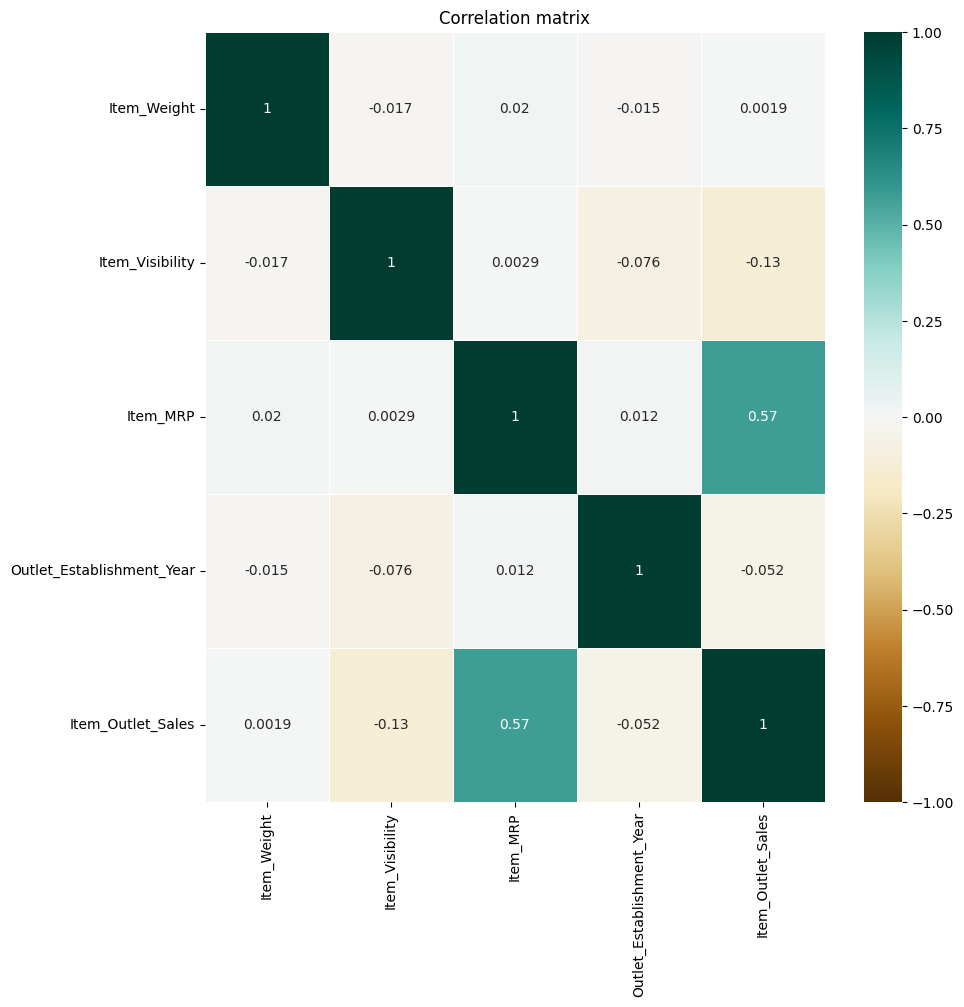

In [299]:
viz.corr_heatmap(data=dataframe)

In [300]:
dataframe.isna().sum()


Item_Identifier                 0
Item_Weight                   818
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1439
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [301]:
numeric = dataframe.select_dtypes(include=np.number)
numeric_columns = numeric.columns
dataframe[numeric_columns] = dataframe[numeric_columns].fillna(dataframe.mean())

C:\Users\47466\AppData\Local\Temp\ipykernel_2388\750579426.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataframe[numeric_columns] = dataframe[numeric_columns].fillna(dataframe.mean())


In [302]:
dataframe.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1439
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [303]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5000 non-null   object 
 1   Item_Weight                5000 non-null   float64
 2   Item_Fat_Content           5000 non-null   object 
 3   Item_Visibility            5000 non-null   float64
 4   Item_Type                  5000 non-null   object 
 5   Item_MRP                   5000 non-null   float64
 6   Outlet_Identifier          5000 non-null   object 
 7   Outlet_Establishment_Year  5000 non-null   int64  
 8   Outlet_Size                3561 non-null   object 
 9   Outlet_Location_Type       5000 non-null   object 
 10  Outlet_Type                5000 non-null   object 
 11  Item_Outlet_Sales          5000 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 468.9+ KB


In [304]:
dataframe['Outlet_Size'].describe()

count       3561
unique         3
top       Medium
freq        1605
Name: Outlet_Size, dtype: object

In [305]:
dataframe['Outlet_Size'].fillna(inplace=True, value='Medium')

dataframe.drop(columns=['Item_Identifier'], inplace=True)


In [306]:
from sklearn.preprocessing import LabelEncoder

columns=['Item_Outlet_Sales', 'Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']

labelEncoder = LabelEncoder()
dataframe[columns] = dataframe[columns].apply(LabelEncoder().fit_transform)

In [307]:
dataframe.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,2029
1,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,333
2,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,1334
3,19.20,2,0.000000,6,182.0950,0,1998,1,2,0,537
4,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,690


In [308]:
from keras.models import Sequential 
from keras.layers import Dense, InputLayer
from keras.optimizers import RMSprop 
from keras.callbacks import EarlyStopping 
from sklearn import preprocessing 
from sklearn.preprocessing import scale

In [309]:
# https://www.tutorialspoint.com/keras/keras_regression_prediction_using_mpl.htm

In [310]:
from sklearn.model_selection import train_test_split

y = dataframe['Item_Outlet_Sales']

X = dataframe.drop(columns=['Item_Outlet_Sales'], axis=1)

print(X.dtypes)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                      int32
Item_MRP                     float64
Outlet_Identifier              int32
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
dtype: object


In [311]:
x_train_scaled = preprocessing.scale(x_train)
scaler = preprocessing.StandardScaler().fit(x_train)
x_test_scaled = scaler.transform(x_test)

In [312]:
model = Sequential() 
model.add(InputLayer((x_train.shape[1])))
model.add(Dense(64, kernel_initializer = 'normal', activation = 'relu')) 
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1))

In [313]:
model.compile(
   loss = 'mse', 
   optimizer = 'Adam',
   metrics = ['Accuracy']
)

In [314]:
history = model.fit(
   np.asarray(x_train).astype(np.float32), np.asarray(y_train).astype(np.float32),    
   batch_size=128, 
   epochs = 500, 
   verbose = 1,
   validation_split = 0.2,
   callbacks = [EarlyStopping(monitor = 'val_loss', patience = 20)]
)

Epoch 1/500
25/25 [==============================] - 0s 5ms/step - loss: 1780651.6250 - Accuracy: 3.1250e-04 - val_loss: 1485097.8750 - val_Accuracy: 0.0000e+00
Epoch 2/500
25/25 [==============================] - 0s 2ms/step - loss: 1057866.6250 - Accuracy: 3.1250e-04 - val_loss: 756098.5000 - val_Accuracy: 0.0000e+00
Epoch 3/500
25/25 [==============================] - 0s 2ms/step - loss: 550651.6875 - Accuracy: 3.1250e-04 - val_loss: 538502.8750 - val_Accuracy: 0.0000e+00
Epoch 4/500
25/25 [==============================] - 0s 1ms/step - loss: 499931.1875 - Accuracy: 3.1250e-04 - val_loss: 532694.9375 - val_Accuracy: 0.0000e+00
Epoch 5/500
25/25 [==============================] - 0s 1ms/step - loss: 493631.6875 - Accuracy: 3.1250e-04 - val_loss: 528041.6250 - val_Accuracy: 0.0000e+00
Epoch 6/500
25/25 [==============================] - 0s 1ms/step - loss: 489295.0938 - Accuracy: 3.1250e-04 - val_loss: 524500.5625 - val_Accuracy: 0.0000e+00
Epoch 7/500
25/25 [========================

In [315]:
score = model.evaluate(x_test, y_test, verbose = 0)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 189628.859375
Test accuracy: 0.0


In [316]:
from sklearn.metrics import r2_score
prediction = model.predict(x_test)
print(r2_score(y_test, prediction))

32/32 [==============================] - 0s 581us/step
0.6354531285197269
